In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets

# Load the dataset into a Pandas DataFrame
data = pd.read_excel('emdat_public_2023_05_02_query_uid-umjMCi.xlsx')  # Replace 'disasters_data.csv' with the path to your dataset file

# Convert the 'Longitude' and 'Latitude' columns to strings
data['Longitude'] = data['Longitude'].astype(str)
data['Latitude'] = data['Latitude'].astype(str)


# Get the unique natural disaster types in the dataset
disaster_types = data['Disaster Type'].unique()

# Create the dropdown widget
dropdown = widgets.Dropdown(options=disaster_types, description='Select disaster type:')

# Display the dropdown widget
display(dropdown)

# Create an output widget to display the map
output = widgets.Output()

# Function to handle the dropdown selection
def handle_selection(change):
    selected_type = change.new
    selected_data = data[data['Disaster Type'] == selected_type]
    
    with output:
        # Create a figure and set the projection to a map projection
        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Add map features
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND)

        # Plot the disaster points on the map
        ax.scatter(selected_data['Longitude'], selected_data['Latitude'], transform=ccrs.PlateCarree(), marker='o', color='red')

        # Set the title
        plt.title('Natural Disasters Map - {}'.format(selected_type))

        # Show the plot
        plt.show()

# Register the function to handle the dropdown selection event
dropdown.observe(handle_selection, names='value')

# Display the output widget
display(output)


Dropdown(description='Select disaster type:', options=('Drought', 'Earthquake', 'Volcanic activity', 'Mass mov…

Output()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets

# Load the dataset into a Pandas DataFrame
data = pd.read_excel('emdat_public_2023_05_02_query_uid-umjMCi.xlsx')  # Replace the file path with your Excel file

# Convert the 'Longitude' and 'Latitude' columns to strings
data['Longitude'] = data['Longitude'].astype(str)
data['Latitude'] = data['Latitude'].astype(str)

# Get the unique natural disaster types and years in the dataset
disaster_types = data['Disaster Type'].unique()
years = data['Year'].unique()

# Determine the available start and end years in increments of 10 years
start_year = min(years)
end_year = max(years)
start_year_rounded = (start_year // 10) * 10
end_year_rounded = ((end_year // 10) + 1) * 10
year_options = list(range(start_year_rounded, end_year_rounded, 10))

# Create the dropdown widgets
dropdown_type = widgets.Dropdown(options=disaster_types, description='Select disaster type:')
dropdown_year = widgets.Dropdown(options=year_options, description='Select year:')

# Display the dropdown widgets
display(widgets.HBox([dropdown_type, dropdown_year]))

# Create an output widget to display the map
output = widgets.Output()

# Function to handle the dropdown selection
def handle_selection(change):
    selected_type = dropdown_type.value
    selected_year = dropdown_year.value
    
    selected_data = data[(data['Disaster Type'] == selected_type) & (data['Year'] >= selected_year) & (data['Year'] < selected_year + 10)]
    
    with output:
        # Create a figure and set the projection to a map projection
        fig = plt.figure(figsize=(12, 8))
        ax = plt.axes(projection=ccrs.PlateCarree())

        # Add map features
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS)
        ax.add_feature(cfeature.LAND)

        # Plot the disaster points on the map
        ax.scatter(selected_data['Longitude'], selected_data['Latitude'], transform=ccrs.PlateCarree(), marker='o', color='red')

        # Set the title
        plt.title('Natural Disasters Map - {} ({}-{})'.format(selected_type, selected_year, selected_year + 9))

        # Show the plot
        plt.show()

# Register the function to handle the dropdown selection events
dropdown_type.observe(handle_selection, names='value')
dropdown_year.observe(handle_selection, names='value')

# Display the output widget
display(output)


Output()

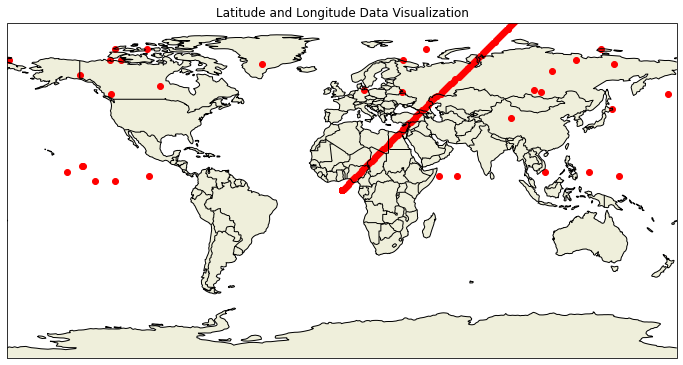

In [14]:
# Extract latitude and longitude values
latitude = data['Latitude']
longitude = data['Longitude']

# Set up the map projection and styling
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)

# Plot latitude and longitude points on the map
ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), marker='o', color='red')

# Customize scatter plot appearance
# Additional customization options:
# - Marker style: marker='o' (circle), marker='s' (square), etc.
# - Color: color='red', color='blue', etc.
# - Size: s=10 (small), s=50 (large), etc.
# - Transparency: alpha=0.5 (partially transparent), alpha=1.0 (opaque)

# Add a title
plt.title('Latitude and Longitude Data Visualization')

# Show the plot
plt.show()

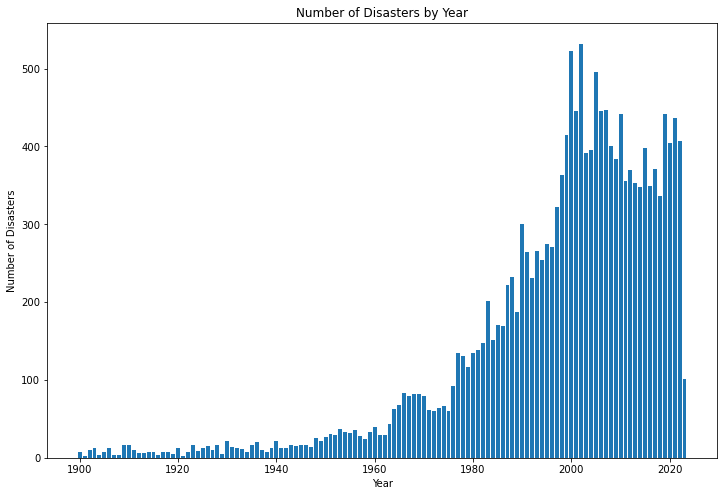

In [18]:
# Group the data by year and count the number of occurrences
disasters_by_year = data.groupby('Year').size()

# Create a bar chart or histogram
plt.figure(figsize=(12, 8))
plt.bar(disasters_by_year.index, disasters_by_year.values)

# Customize the chart appearance
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Year')

# Show the histogram
plt.show()

<Figure size 864x576 with 0 Axes>

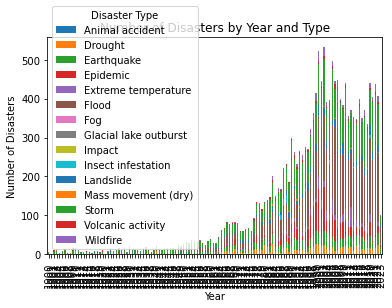

In [19]:
# Group the data by year and disaster type and count the number of occurrences
disasters_by_year_type = data.groupby(['Year', 'Disaster Type']).size().unstack()

# Create a stacked bar chart or side-by-side bar chart
plt.figure(figsize=(12, 8))
disasters_by_year_type.plot(kind='bar', stacked=True)

# Customize the chart appearance
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Year and Type')
plt.legend(title='Disaster Type')

# Show the histogram
plt.show()

Available Disaster Types:
1. Drought
2. Earthquake
3. Volcanic activity
4. Mass movement (dry)
5. Storm
6. Flood
7. Epidemic
8. Landslide
9. Wildfire
10. Extreme temperature
11. Fog
12. Insect infestation
13. Impact
14. Animal accident
15. Glacial lake outburst
Select a Disaster Type (Enter the corresponding number): 2

Number of Disasters by Country for Earthquake:
                        Country  DisasterCount
21                        China            203
51                    Indonesia            145
52   Iran (Islamic Republic of)            137
113                      Turkey            114
57                        Japan             70
..                          ...            ...
92                        Samoa              1
93                       Serbia              1
94            Serbia Montenegro              1
95                   Seychelles              1
48                      Hungary              1

[125 rows x 2 columns]


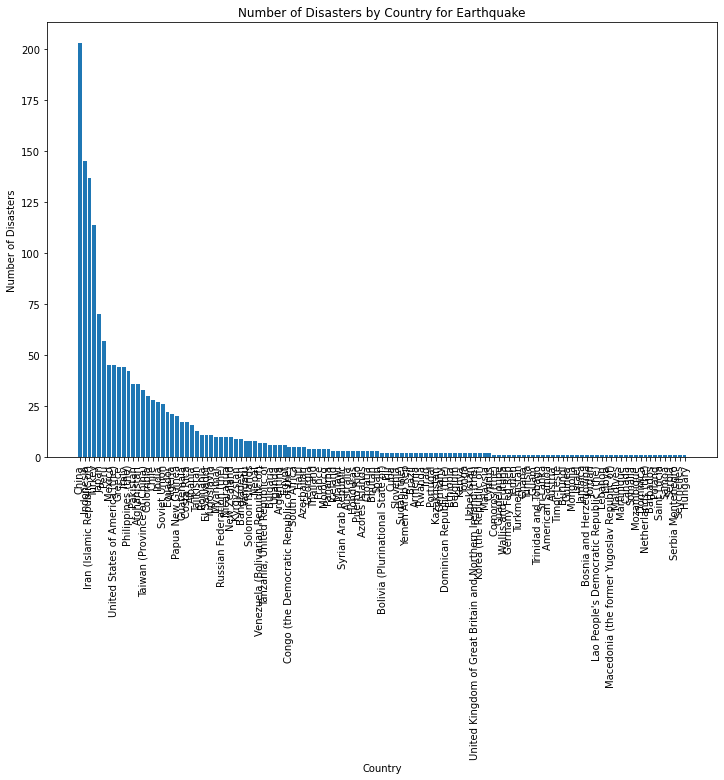

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset containing the disaster data
data = pd.read_excel('emdat_public_2023_05_02_query_uid-umjMCi.xlsx')  # Replace the file path with your Excel file

# Get the unique disaster types in the dataset
disaster_types = data['Disaster Type'].unique()

# Prompt the user to select a disaster type
print("Available Disaster Types:")
for index, disaster_type in enumerate(disaster_types):
    print(f"{index+1}. {disaster_type}")

selected_index = int(input("Select a Disaster Type (Enter the corresponding number): "))
selected_disaster_type = disaster_types[selected_index - 1]

# Filter the data based on the selected disaster type
selected_data = data[data['Disaster Type'] == selected_disaster_type]

# Group the filtered data by country and calculate the total number of disasters for each country
disasters_by_country = selected_data.groupby('Country').size().reset_index(name='DisasterCount')

# Sort the data by the number of disasters in descending order
disasters_by_country = disasters_by_country.sort_values('DisasterCount', ascending=False)

# Display the number of disasters by country for the selected disaster type
print(f"\nNumber of Disasters by Country for {selected_disaster_type}:")
print(disasters_by_country)

# Create a bar plot to visualize the number of disasters by country
plt.figure(figsize=(12, 8))
plt.bar(disasters_by_country['Country'], disasters_by_country['DisasterCount'])
plt.xlabel('Country')
plt.ylabel('Number of Disasters')
plt.title(f'Number of Disasters by Country for {selected_disaster_type}')
plt.xticks(rotation=90)
plt.show()


Available Disaster Types:
1. Drought
2. Earthquake
3. Volcanic activity
4. Mass movement (dry)
5. Storm
6. Flood
7. Epidemic
8. Landslide
9. Wildfire
10. Extreme temperature
11. Fog
12. Insect infestation
13. Impact
14. Animal accident
15. Glacial lake outburst
Select a Disaster Type (Enter the corresponding number): 2

Available Years:
1. 1900
2. 1902
3. 1903
4. 1904
5. 1905
6. 1906
7. 1907
8. 1908
9. 1909
10. 1910
11. 1911
12. 1912
13. 1914
14. 1915
15. 1916
16. 1917
17. 1918
18. 1919
19. 1920
20. 1921
21. 1922
22. 1923
23. 1924
24. 1925
25. 1926
26. 1927
27. 1928
28. 1929
29. 1930
30. 1931
31. 1932
32. 1933
33. 1934
34. 1935
35. 1936
36. 1937
37. 1938
38. 1939
39. 1940
40. 1941
41. 1942
42. 1943
43. 1944
44. 1945
45. 1946
46. 1947
47. 1948
48. 1949
49. 1950
50. 1951
51. 1952
52. 1953
53. 1954
54. 1955
55. 1956
56. 1957
57. 1958
58. 1959
59. 1960
60. 1961
61. 1962
62. 1963
63. 1964
64. 1965
65. 1966
66. 1967
67. 1968
68. 1969
69. 1970
70. 1971
71. 1972
72. 1973
73. 1974
74. 1975
75. 

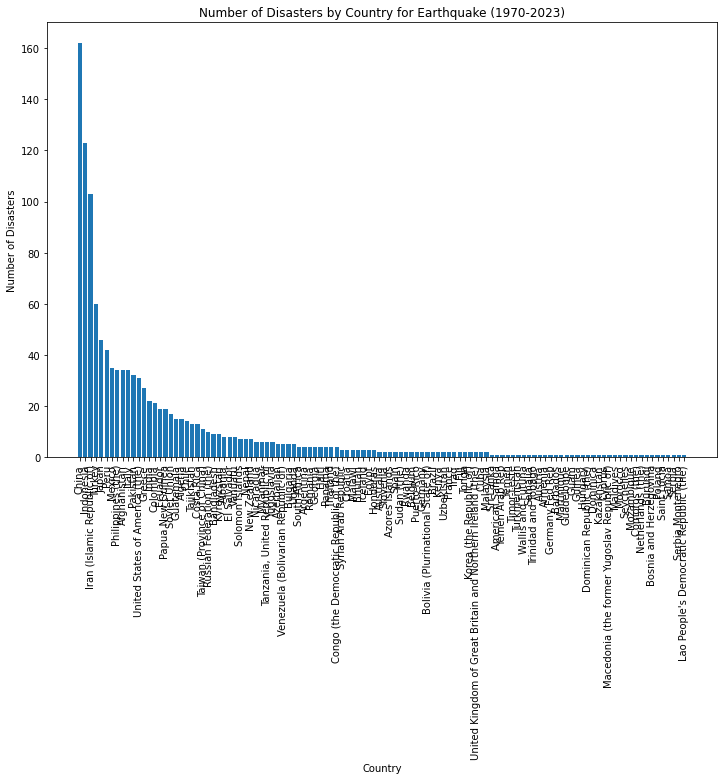

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset containing the disaster data
data = pd.read_excel('emdat_public_2023_05_02_query_uid-umjMCi.xlsx')  # Replace the file path with your Excel file

# Get the unique disaster types in the dataset
disaster_types = data['Disaster Type'].unique()

# Prompt the user to select a disaster type
print("Available Disaster Types:")
for index, disaster_type in enumerate(disaster_types):
    print(f"{index+1}. {disaster_type}")

selected_index = int(input("Select a Disaster Type (Enter the corresponding number): "))
selected_disaster_type = disaster_types[selected_index - 1]

# Filter the data based on the selected disaster type
selected_data = data[data['Disaster Type'] == selected_disaster_type]

# Get the unique years in the dataset
years = data['Year'].unique()

# Prompt the user to select a year range
print("\nAvailable Years:")
for index, year in enumerate(years):
    print(f"{index+1}. {year}")

start_index = int(input("Select the starting year (Enter the corresponding number): "))
end_index = int(input("Select the ending year (Enter the corresponding number): "))

selected_start_year = years[start_index - 1]
selected_end_year = years[end_index - 1]

# Filter the data based on the selected year range
selected_data = selected_data[(selected_data['Year'] >= selected_start_year) & (selected_data['Year'] <= selected_end_year)]

# Group the filtered data by country and calculate the total number of disasters for each country
disasters_by_country = selected_data.groupby('Country').size().reset_index(name='DisasterCount')

# Sort the data by the number of disasters in descending order
disasters_by_country = disasters_by_country.sort_values('DisasterCount', ascending=False)

# Display the number of disasters by country for the selected disaster type and year range
print(f"\nNumber of Disasters by Country for {selected_disaster_type} ({selected_start_year}-{selected_end_year}):")
print(disasters_by_country)

# Create a bar plot to visualize the number of disasters by country
plt.figure(figsize=(12, 8))
plt.bar(disasters_by_country['Country'], disasters_by_country['DisasterCount'])
plt.xlabel('Country')
plt.ylabel('Number of Disasters')
plt.title(f'Number of Disasters by Country for {selected_disaster_type} ({selected_start_year}-{selected_end_year})')
plt.xticks(rotation=90)
plt.show()


In [43]:
import pandas as pd

# Load the dataset containing the disaster data into a pandas DataFrame
data = pd.read_excel('emdat_public_2023_05_02_query_uid-umjMCi.xlsx')  # Replace the file path with your Excel file

# Function to clean and convert latitude and longitude values to numeric type
def clean_coordinates(coord):
    # Remove non-numeric characters and keep only the numeric part
    coord = ''.join(filter(lambda x: x.isdigit() or x in ['.', '-'], str(coord)))
    # Convert the cleaned value to a numeric type
    return pd.to_numeric(coord, errors='coerce')

# Clean and convert the latitude and longitude columns
data['Latitude'] = data['Latitude'].apply(clean_coordinates)
data['Longitude'] = data['Longitude'].apply(clean_coordinates)

# Filter out the rows where latitude or longitude values are missing
filtered_data = data.dropna(subset=['Latitude', 'Longitude'])

# Group the filtered data by country and calculate the mean latitude and longitude for each country
mean_coordinates = filtered_data.groupby('Country').agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()

# Iterate over the rows of the original dataframe and fill in the missing latitude and longitude values based on the country
for index, row in data.iterrows():
    if pd.isna(row['Latitude']) or pd.isna(row['Longitude']):
        country = row['Country']
        matching_country = mean_coordinates[mean_coordinates['Country'] == country]
        if not matching_country.empty:
            mean_latitude = matching_country['Latitude'].values[0]
            mean_longitude = matching_country['Longitude'].values[0]
            data.at[index, 'Latitude'] = mean_latitude
            data.at[index, 'Longitude'] = mean_longitude

# Display the updated dataframe with completed latitude and longitude values
print(data)


              Dis No  Year   Seq           Glide Disaster Group  \
0      1900-9002-CPV  1900  9002             NaN        Natural   
1      1900-9001-IND  1900  9001             NaN        Natural   
2      1902-0012-GTM  1902    12             NaN        Natural   
3      1902-0003-GTM  1902     3             NaN        Natural   
4      1902-0010-GTM  1902    10             NaN        Natural   
...              ...   ...   ...             ...            ...   
16626  2023-0110-ZMB  2023   110             NaN        Natural   
16627  2023-0068-ZMB  2023    68  EP-2023-000013        Natural   
16628  2023-0095-ZWE  2023    95             NaN        Natural   
16629  2023-0022-SRB  2023    22             NaN        Natural   
16630  2023-0140-SSD  2023   140  EP-2023-000039        Natural   

      Disaster Subgroup      Disaster Type   Disaster Subtype  \
0        Climatological            Drought            Drought   
1        Climatological            Drought            Drought   


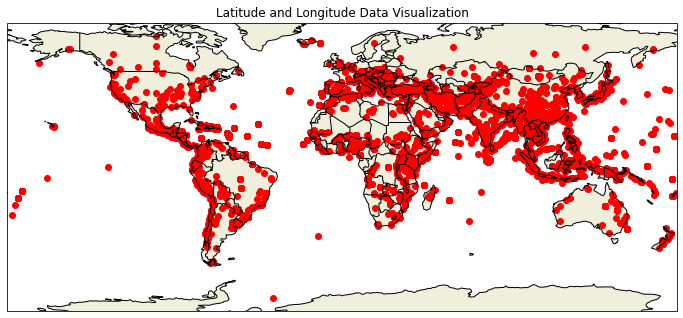

In [44]:
# Extract latitude and longitude values
latitude = data['Latitude']
longitude = data['Longitude']

# Set up the map projection and styling
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)

# Plot latitude and longitude points on the map
ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), marker='o', color='red')

# Customize scatter plot appearance
# Additional customization options:
# - Marker style: marker='o' (circle), marker='s' (square), etc.
# - Color: color='red', color='blue', etc.
# - Size: s=10 (small), s=50 (large), etc.
# - Transparency: alpha=0.5 (partially transparent), alpha=1.0 (opaque)

# Add a title
plt.title('Latitude and Longitude Data Visualization')

# Show the plot
plt.show()

Dropdown(description='Select year:', options=(1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000…

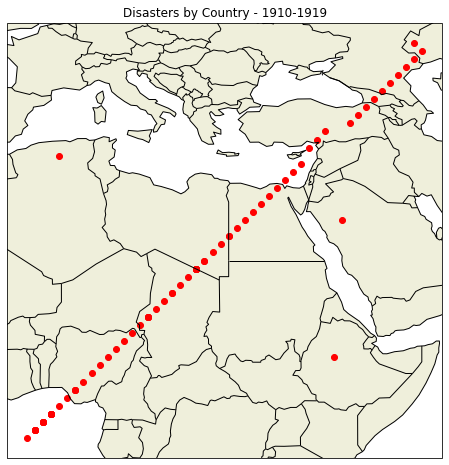

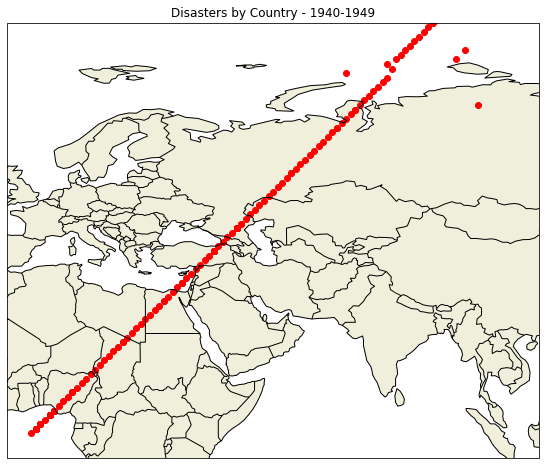

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ipywidgets as widgets



# Get the available start and end years in increments of 10 years
start_year = min(data['Year'])
end_year = max(data['Year'])
year_options = list(range(start_year, end_year+1, 10))

# Create the dropdown widget for selecting the year range
dropdown_year = widgets.Dropdown(options=year_options, description='Select year:')

# Display the dropdown widget
display(dropdown_year)

# Function to handle the dropdown selection
def handle_selection(change):
    selected_year = int(dropdown_year.value)  # Convert the selected year to an integer

    # Filter the data based on the selected year range
    filtered_data = data[(data['Year'] >= selected_year) & (data['Year'] < selected_year + 10)].copy()

    # Convert latitude and longitude values to strings
    filtered_data['Longitude'] = filtered_data['Longitude'].astype(str)
    filtered_data['Latitude'] = filtered_data['Latitude'].astype(str)

    # Extract latitude and longitude values
    latitude = filtered_data['Latitude']
    longitude = filtered_data['Longitude']

    # Set up the map projection and styling
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)

    # Plot latitude and longitude points on the map
    ax.scatter(longitude, latitude, transform=ccrs.PlateCarree(), marker='o', color='red')

    # Customize scatter plot appearance
    # Additional customization options:
    # - Marker style: marker='o' (circle), marker='s' (square), etc.
    # - Color: color='red', color='blue', etc.
    # - Size: s=10 (small), s=50 (large), etc.
    # - Transparency: alpha=0.5 (partially transparent), alpha=1.0 (opaque)

    # Add a title
    plt.title('Disasters by Country - {}-{}'.format(selected_year, selected_year+9))

    # Show the plot
    plt.show()

# Register the function to handle the dropdown selection event
dropdown_year.observe(handle_selection, names='value')
